#### Question 1 Code 

Read the article and reproduce the results presented in Table-4 using Python modules and packages (including your own script or customised codes). Write a report summarising the dataset, used ML methods, experiment protocol and results including variations, if any. During reproducing the results:

In [546]:
#####################################
# Package extensions and other info:
#####################################

# install extension for OneR Classifier - This is required if running code again
!pip install mlxtend  

#Installing imblearn - this is required if running code again 
!pip install -U imbalanced-learn

# suppressed warning for mcc calculation "double scaler warning", validated that the warning had no impact on 
# results. This is due to sklearn version, 0.24.1. Upgrade was not necessary after testing impact. 
# No other warnings received while running the code. 
import warnings
warnings.filterwarnings("ignore")

In [547]:
# Import Packages

%matplotlib inline 

# Standard 
import pandas as pd
import numpy as np
import math

# visualisation
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn import metrics

# models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import OneRClassifier
from sklearn.linear_model import LogisticRegressionCV

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

# Optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

print("Packages imported successfully")

Packages imported successfully


In [548]:
# Import Heart Failure Data set, check for blank rows and clean data if required

# Read data from File 
hfcr_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Print Dimension of the imported data file
print(f"Heart Failure data frame dimensions: {hfcr_data.shape}")

# Assign all rows with blank to a new variable
hfcr_data_na = hfcr_data[hfcr_data.isna().any(axis = 1)]

# check for blank rows in the data set and remove them
if hfcr_data_na.shape[0] == 0:
    print(f"Number of features with NaN: {hfcr_data_na.shape[0]}")
    print("Preprocessing output: No blank rows to be removed from the data set")
else:
    print(f"There are {hfcr_data_na.shape[0]} features with NaN")
    # Removing row on the dataset with blank values
    hfcr_data.dropna(thresh= 205, inplace = True)
    print("Preprocessing output: Rows with NaN removed")
    print(f"Heart failure data frame dimension post removal of NaN {hfcr_data.shape}")

# print dimensions of data set after checking NaNs
print(f"Heart Failure data frame dimensions after NaN check: {hfcr_data.shape}")

Heart Failure data frame dimensions: (299, 13)
Number of features with NaN: 0
Preprocessing output: No blank rows to be removed from the data set
Heart Failure data frame dimensions after NaN check: (299, 13)


In [549]:
#Check for missing attibute values 
hfcr_data_check_nan = hfcr_data[hfcr_data.isna().any(axis = 1)]
print(f"Rows with missing data in one or more cells: \n\n{hfcr_data_check_nan.to_string()}")

Rows with missing data in one or more cells: 

Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []


In [550]:

# Show top 5 rows and display all columns 
print("Dataset top rows:")
num_columns = len(hfcr_data.columns)
pd.set_option("display.max_columns", num_columns)
hfcr_data.head(5)

Dataset top rows:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [551]:
hfcr_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [552]:
hfcr_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [553]:
hfcr_data_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction'
                  , 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex'
                  , 'smoking', 'time', 'DEATH_EVENT']
hfcr_data_features =['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction'
                  , 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex'
                  , 'smoking', 'time']
hfcr_data_label = ['DEATH_EVENT']

hfcr_data_features_noncat_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction'
                             , 'platelets', 'serum_creatinine', 'serum_sodium']

In [554]:
# Create overall results dataframe - Table 4 

ov_predict_rslts_data = []
ov_predict_rslts_cols=["Method","MCC", "F1 score", "Accuracy", "TP rate", "TN rate", "PR AUC", "ROC AUC", "Test Run"]
ov_predict_rslts_df = pd.DataFrame(ov_predict_rslts_data, columns = ov_predict_rslts_cols)
q2_predict_rslts_df = pd.DataFrame(ov_predict_rslts_data, columns = ov_predict_rslts_cols)


#### Create Functions: Performance Metrics Function and GridSearchCV Function

In [555]:
def model_eval(y_true, y_pred, method, test_iter):
    """
    This function calculates the performance matric for predictions. 
    Measures: MCC, F1 Score, Accuracy, TPR, TNR, PR AUC, ROC AUC
    """
    
    mcc = 0.0
    f1_score = 0.0
    accurary = accuracy_score(y_true, y_pred)
    tp_rate = 0.0
    tn_rate = 0.0
    pr_auc = 0.0
    roc_auc = 0.0
    
    conf_mat = confusion_matrix(y_true, y_pred)
    TP = conf_mat[1,1]
    FP = conf_mat[1,0]
    FN = conf_mat[0,1]
    TN = conf_mat[0,0]
    
    mcc = matthews_corrcoef(y_true, y_pred)
    
    tp_rate = TP / (TP + FP)
    tn_rate = TN / (TN + FN)
    
    # F1 = 2 * (precision * recall) / (precision + recall)
    f1_score = 2 * TP / (2 * TP + FP + FN)
    
    
    pr_auc = average_precision_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    model_eval_rslts = {"Method":method,"MCC":mcc, "F1 score":f1_score, 
            "Accuracy":round(accurary,3), "TP rate":tp_rate, "TN rate":tn_rate,
            "PR AUC":pr_auc, "ROC AUC":roc_auc, "Test Run":test_iter}
    
    return model_eval_rslts



def gridsearchcv(param, X_train, y_train, estimator):
    
    parameter = param
    
    grid = GridSearchCV(estimator,param)
    model= grid.fit(X_train, y_train)

    #print(model)
    print(f"{estimator} has best accurary of {model.best_score_:.2f} with parameters {model.best_estimator_}")
    print()
    return model.best_estimator_


    

#### Split Features and Label

In [556]:
# split label and features columns

# all X and y
hfcr_X = hfcr_data.loc[:,hfcr_data.columns !='DEATH_EVENT']
hfcr_y = hfcr_data.loc[:,hfcr_data.columns =='DEATH_EVENT']

# X without time 
hfcr_ed_X = hfcr_data.loc[:,(hfcr_data.columns !='DEATH_EVENT') & (hfcr_data.columns != 'time')]


# X for OneR Classificaton 
hfcr_oner_X = hfcr_data.loc[:,(hfcr_data.columns !='DEATH_EVENT') & (hfcr_data.columns != 'time')]

# Feature Selection - Question 2  
## Option 1: 
#hfcr_fs_X = hfcr_data[["time", "serum_creatinine","ejection_fraction","age", "serum_sodium"]]
## Option 2: 
hfcr_fs_X = hfcr_data[["time", "serum_creatinine","ejection_fraction"]]

##### Linear Regression Model 

In [557]:
# set iterations 
iterations = 101
threshold = 0.5
lr_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, test_size = 0.2)

    # build model, fit training data and predict results of test data 
    lr_model =  LinearRegression()
    lr_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = lr_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    hfcr_y_predict_bin = hfcr_y_predict 
    hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    lr_model_eval = lr_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict_bin, "Linear Regression", i),
                                         ignore_index = True)
    
   
    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df=lr_model_eval.groupby("Method", axis = 0).mean().round(3)


print("Linear Regression Results:\n")
# display Results
lr_model_eval.groupby("Method", axis = 0).mean().round(3).reset_index()


Linear Regression Results:



,Method,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
0,Linear Regression,0.32,0.467,0.723,0.383,0.89,0.446,0.636


#### Naive Bayes Model

In [558]:
# set iterations 
iterations = 101
threshold = 0.5
nb_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, test_size = 0.2)

    # build model, fit training data and predict results of test data 
    nb_model =  GaussianNB()
    nb_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = nb_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    hfcr_y_predict_bin = hfcr_y_predict 
    hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    nb_model_eval = nb_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict_bin, "Naive Bayes", i),
                                         ignore_index = True)

    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(nb_model_eval.groupby("Method", axis = 0).mean().round(3))

print("Naive Bayes Results:\n")
# display Results
nb_model_eval.groupby("Method", axis = 0).mean().round(3)


Naive Bayes Results:



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
Naive Bayes,0.235,0.334,0.707,0.24,0.927,0.395,0.583


##### KNN

In [559]:


# set iterations 
iterations = 101 #should be 101
threshold = 0.5
knn_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data into 80% - 20%
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, 
                                                                             test_size = 0.2)
    # Split Training Set into 60% Training set and 20% validatio Set of whole data set 
    hfcr_X_train, hfcr_X_val, hfcr_y_train , hfcr_y_val = train_test_split(hfcr_X_train, hfcr_y_train, 
                                                                             test_size = 0.25)

    max_k = 101 # should be 101  
    knn_mcc_cols = ['k', 'mcc']
    knn_mcc_df = pd.DataFrame(columns = knn_mcc_cols )
    
    for k in range(1,max_k):
        knn_val_model =  KNeighborsClassifier(n_neighbors = k)
        knn_val_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
        hfcr_y_val_predict = knn_val_model.predict(hfcr_X_val)
        
        mcc = matthews_corrcoef(hfcr_y_val.values, hfcr_y_val_predict)
        
        mcc_rslts = {'k':k, 'mcc':mcc}
        
        #debug
        #print(f"--{k} - {mcc_rslts}")
        #print(hfcr_y_val)
        #print(hfcr_y_val_predict)
        
        knn_mcc_df = knn_mcc_df.append(mcc_rslts, ignore_index = True)
        
    best_mcc = knn_mcc_df.loc[knn_mcc_df['mcc'] == knn_mcc_df['mcc'].max()]
    best_mcc2 = best_mcc.loc[best_mcc['k']==best_mcc['k'].max()]
    best_k = best_mcc2['k'].values[0].astype('int')
    
    # print(best_mcc)
    # print(mcc_rslts)
    
    # build model, fit training data and predict results of test data 
    knn_model =  KNeighborsClassifier(n_neighbors = best_k)
    knn_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = knn_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    #hfcr_y_predict_bin = hfcr_y_predict 
    #hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    #hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    knn_model_eval = knn_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict, "K-nearest neighbors", i),
                                         ignore_index = True)
    
   
    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(knn_model_eval.groupby("Method", axis = 0).mean().round(3))

print(f"K-nearest neighbors Results: (with K = {best_k})\n")
# display Results
knn_model_eval.groupby("Method", axis = 0).mean().round(3)


K-nearest neighbors Results: (with K = 100)



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
K-nearest neighbors,-0.033,0.122,0.625,0.097,0.885,0.332,0.491


##### Random Forest 

In [560]:
# set iterations 
iterations = 101
threshold = 0.5
rf_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, test_size = 0.2)

    # build model, fit training data and predict results of test data 
    rf_model =  RandomForestClassifier()
    rf_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = rf_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    # hfcr_y_predict_bin = hfcr_y_predict 
    # hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    # hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    rf_model_eval = rf_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict, "Random Forest", i),
                                         ignore_index = True)

    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(rf_model_eval.groupby("Method", axis = 0).mean().round(3))

print("Random Forest Results:\n")
# display Results
rf_model_eval.groupby("Method", axis = 0).mean().round(3)


Random Forest Results:



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
Random Forest,0.359,0.519,0.736,0.458,0.869,0.465,0.664


##### Decision Tree Classifier

In [561]:
# set iterations 
iterations = 101
threshold = 0.5
dt_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, test_size = 0.2)

    # build model, fit training data and predict results of test data 
    dt_model =  DecisionTreeClassifier()
    dt_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = dt_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    # hfcr_y_predict_bin = hfcr_y_predict 
    # hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    # hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    dt_model_eval = dt_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict, "Decision Tree", i),
                                         ignore_index = True)

    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(dt_model_eval.groupby("Method", axis = 0).mean().round(3))

print("Decision Tree Results:\n")
# display Results
dt_model_eval.groupby("Method", axis = 0).mean().round(3)




Decision Tree Results:



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
Decision Tree,0.271,0.491,0.686,0.497,0.773,0.411,0.635


##### Gradient Boosting Classifier

In [562]:
# set iterations 
iterations = 101
threshold = 0.5
gb_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, test_size = 0.2)

    # build model, fit training data and predict results of test data 
    gb_model =  GradientBoostingClassifier(max_depth = 2, learning_rate = 1, n_estimators = 2, verbose = 0)
    gb_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = gb_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    # hfcr_y_predict_bin = hfcr_y_predict 
    # hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    # hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    gb_model_eval = gb_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict, "Gradient Boost", i),
                                         ignore_index = True)



    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(gb_model_eval.groupby("Method", axis = 0).mean().round(3))

print("Gradient Boosting Results:\n")
# display Results
gb_model_eval.groupby("Method", axis = 0).mean().round(3)


Gradient Boosting Results:



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
Gradient Boost,0.386,0.541,0.741,0.502,0.86,0.48,0.681


##### SVM Linear 

In [563]:
# set iterations 
iterations = 101 #should be 101
threshold = 0.5
lsvc_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data into 80% - 20%
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, 
                                                                             test_size = 0.2)
    # Split Training Set into 60% Training set and 20% validatio Set of whole data set 
    hfcr_X_train, hfcr_X_val, hfcr_y_train , hfcr_y_val = train_test_split(hfcr_X_train, hfcr_y_train, 
                                                                             test_size = 0.25)

  
    c_array = (0.001,0.01,0.1,1,10)
    lsvc_mcc_cols = ['c', 'mcc']
    lsvc_mcc_df = pd.DataFrame(columns = lsvc_mcc_cols )
    
    for c in c_array:
        lsvc_val_model =  LinearSVC(C = c, dual=False) # need to explain this (better predictions , fix converge warning as well)
        lsvc_val_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
        hfcr_y_val_predict = lsvc_val_model.predict(hfcr_X_val)
    
        mcc = matthews_corrcoef(hfcr_y_val.values, hfcr_y_val_predict)
        
        mcc_rslts = {'c':c, 'mcc':mcc}

        lsvc_mcc_df = lsvc_mcc_df.append(mcc_rslts, ignore_index = True)
        
        # debug 
        #print(hfcr_y_val_predict) #most predictions are either all 1 or mostly all zero
        #print(c)
        #print(mcc)
        
    best_mcc = lsvc_mcc_df.loc[lsvc_mcc_df['mcc'] == lsvc_mcc_df['mcc'].max()]
    best_mcc2 = best_mcc.loc[best_mcc['c']==best_mcc['c'].max()]
    best_c = best_mcc2['c'].values[0].astype('float')
    
    # debug 
    #print(best_mcc) # returning 0 mcc

    # build model, fit training data and predict results of test data 
    lsvc_model =  LinearSVC(C = best_c,  dual=False)
    lsvc_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = lsvc_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    #hfcr_y_predict_bin = hfcr_y_predict 
    #hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    #hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    lsvc_model_eval = lsvc_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict, "SVM Linear", i),
                                         ignore_index = True)
    
   
    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(lsvc_model_eval.groupby("Method", axis = 0).mean().round(3))

print(f"SVM Linear Results: with C = {best_c}\n")
# display Results
lsvc_model_eval.groupby("Method", axis = 0).mean().round(3)


SVM Linear Results: with C = 10.0



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
SVM Linear,0.265,0.325,0.718,0.242,0.943,0.409,0.592


##### SVM Radial

In [564]:
# set iterations 
iterations = 101 #should be 101
threshold = 0.5
rsvc_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data into 80% - 20%
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, 
                                                                             test_size = 0.2)
    # Split Training Set into 60% Training set and 20% validatio Set of whole data set 
    hfcr_X_train, hfcr_X_val, hfcr_y_train , hfcr_y_val = train_test_split(hfcr_X_train, hfcr_y_train, 
                                                                             test_size = 0.25)


    c_array = (0.001,0.01,0.1,1,10)
    rsvc_mcc_cols = ['c', 'mcc']
    rsvc_mcc_df = pd.DataFrame(columns = rsvc_mcc_cols )
    
    for c in c_array:
        rsvc_val_model =  SVC(kernel='rbf', C = c) # need to explain this (better predictions , fix converge warning as well)
        rsvc_val_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
        hfcr_y_val_predict = rsvc_val_model.predict(hfcr_X_val)
    
        mcc = matthews_corrcoef(hfcr_y_val.values, hfcr_y_val_predict)
        
        mcc_rslts = {'c':c, 'mcc':mcc}

        rsvc_mcc_df = lsvc_mcc_df.append(mcc_rslts, ignore_index = True)
        
        # debug 
        #print(hfcr_y_val_predict) #most predictions are either all 1 or mostly all zero
        #print(c)
        #print(mcc)
        
    best_mcc = rsvc_mcc_df.loc[rsvc_mcc_df['mcc'] == rsvc_mcc_df['mcc'].max()]
    best_mcc2 = best_mcc.loc[best_mcc['c']==best_mcc['c'].max()]
    best_c = best_mcc2['c'].values[0].astype('float')
    
    # debug 
    #print(best_mcc) # returning 0 mcc

    # build model, fit training data and predict results of test data 
    rsvc_model =  SVC(kernel='rbf',  C = best_c)
    rsvc_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = rsvc_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    #hfcr_y_predict_bin = hfcr_y_predict 
    #hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    #hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    rsvc_model_eval = rsvc_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict, "SVM Radial", i),
                                         ignore_index = True)
    
   
    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(rsvc_model_eval.groupby("Method", axis = 0).mean().round(3))

print(f"SVM Radial Results: with C = {best_c}\n")
# display Results
rsvc_model_eval.groupby("Method", axis = 0).mean().round(3)


SVM Radial Results: with C = 10.0



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
SVM Radial,-0.01,0.007,0.678,0.004,0.993,0.32,0.499


### ANN 

In [565]:
# set iterations 
iterations = 101 #should be 101
threshold = 0.5
mlpc_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)

for i in range(1,iterations):

    # Split training and testing data into 80% - 20%
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_ed_X, hfcr_y, 
                                                                             test_size = 0.2)
    # Split Training Set into 60% Training set and 20% validatio Set of whole data set 
    hfcr_X_train, hfcr_X_val, hfcr_y_train , hfcr_y_val = train_test_split(hfcr_X_train, hfcr_y_train, 
                                                                             test_size = 0.25)

 
    n_array = (5, 10, 25,50,75,100,125,150,175,200,225,250,275,300)
    mlpc_mcc_cols = ['n', 'mcc']
    mlpc_mcc_df = pd.DataFrame(columns = mlpc_mcc_cols )
    
    for n in n_array:
        mlpc_val_model =  MLPClassifier(hidden_layer_sizes=(n,), solver = 'adam') 
        mlpc_val_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
        hfcr_y_val_predict = mlpc_val_model.predict(hfcr_X_val)
    
        mcc = matthews_corrcoef(hfcr_y_val.values, hfcr_y_val_predict)
        
        mcc_rslts = {'n':c, 'mcc':mcc}

        mlpc_mcc_df = mlpc_mcc_df.append(mcc_rslts, ignore_index = True)
        
        # debug 
        # print(hfcr_y_val_predict) #most predictions are either all 1 or mostly all zero
        # print(n)
        # print(mcc)
        
    best_mcc = mlpc_mcc_df.loc[mlpc_mcc_df['mcc'] == mlpc_mcc_df['mcc'].max()]
    best_mcc2 = best_mcc.loc[best_mcc['n']==best_mcc['n'].max()]
    best_n = best_mcc2['n'].values[0].astype('int')
    
    
    # debug 
    #print(best_mcc) # returning 0 mcc
    #print(best_n)
    #print(type(best_n))
    # build model, fit training data and predict results of test data 
    mlpc_model =  MLPClassifier(hidden_layer_sizes=(best_n,), solver = 'adam')
    mlpc_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = mlpc_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    #hfcr_y_predict_bin = hfcr_y_predict 
    #hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    #hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    mlpc_model_eval = mlpc_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict, "Artificial Neural Network", i),
                                         ignore_index = True)

    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(mlpc_model_eval.groupby("Method", axis = 0).mean().round(3))

print(f"Artificial Neural Network Results: with 1 hidden layer and {best_n} neurons\n")
# display Results
mlpc_model_eval.groupby("Method", axis = 0).mean().round(3)


Artificial Neural Network Results: with 1 hidden layer and 10 neurons



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
Artificial Neural Network,-0.0,0.21,0.523,0.431,0.568,0.322,0.5


##### OneRule Classifier

In [566]:
# Testing of KBinsDiscretizer
#oner_feature_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#hfcr_oner_Xd = oner_feature_discretizer.fit_transform(hfcr_oner_X)
#print(hfcr_oner_X)
#print(hfcr_oner_Xd)

In [567]:
# set iterations 
iterations = 101
threshold = 0.5
oner_model_eval = pd.DataFrame(columns = ov_predict_rslts_cols)



oner_feature_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
hfcr_oner_Xd = oner_feature_discretizer.fit_transform(hfcr_oner_X)



for i in range(1,iterations):


    
    # Split training and testing data
    hfcr_X_train, hfcr_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_oner_Xd, hfcr_y, test_size = 0.2)

    # build model, fit training data and predict results of test data 
    oner_model =  OneRClassifier()
    oner_model.fit(hfcr_X_train, hfcr_y_train.values.ravel())
    hfcr_y_predict = oner_model.predict(hfcr_X_test)
    
    # Linear Regression Binning 
    # hfcr_y_predict_bin = hfcr_y_predict 
    # hfcr_y_predict_bin = np.where(hfcr_y_predict_bin >= threshold, 1, hfcr_y_predict_bin)
    # hfcr_y_predict_bin = np.where(hfcr_y_predict_bin < threshold, 0, hfcr_y_predict_bin)


    # Prediction results 
    oner_model_eval = oner_model_eval.append(model_eval( hfcr_y_test, hfcr_y_predict, "One Rule", i),
                                         ignore_index = True)



    
# DataFrame Expected Results - testing only 
# print("\nDataFrame output expected Results:\n")
# print(lr_model_eval.mean())
# print()

# save aggregated results to overall results dataframe
ov_predict_rslts_df = ov_predict_rslts_df.append(oner_model_eval.groupby("Method", axis = 0).mean().round(3))

print("OneR Results:\n")
# display Results
oner_model_eval.groupby("Method", axis = 0).mean().round(3)



OneR Results:



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
One Rule,0.275,0.352,0.711,0.264,0.927,0.415,0.595


##### Overall results - reconstruction of table 4 

In [568]:
# view results (reconstruction of Table 4)
print("\nTable 4 ML Models results after rebuilt in Python: \n")

ov_predict_rslts_df
#ov_predict_rslts_df.style.highlight_max(color = 'lightblue', axis = 0)


Table 4 ML Models results after rebuilt in Python: 



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
Linear Regression,0.320,0.467,0.723,0.383,0.890,0.446,0.636
Naive Bayes,0.235,0.334,0.707,0.240,0.927,0.395,0.583
K-nearest neighbors,-0.033,0.122,0.625,0.097,0.885,0.332,0.491
Random Forest,0.359,0.519,0.736,0.458,0.869,0.465,0.664
Decision Tree,0.271,0.491,0.686,0.497,0.773,0.411,0.635
Gradient Boost,0.386,0.541,0.741,0.502,0.860,0.480,0.681
SVM Linear,0.265,0.325,0.718,0.242,0.943,0.409,0.592
SVM Radial,-0.010,0.007,0.678,0.004,0.993,0.320,0.499
Artificial Neural Network,-0.000,0.210,0.523,0.431,0.568,0.322,0.500


#### Question 2 - Code 

##### Section 1: Feature Selection 

In [569]:
# Feature selection 


# Split data into train test sets 
hfcr_all_X_train, hfcr_all_X_test, hfcr_y_train , hfcr_y_test = train_test_split(hfcr_X, 
                                                                                 hfcr_y, 
                                                                                 test_size = 0.2,
                                                                                 random_state=79)

# Use SelectKBest to assess feature for the selection process 
# approach 1 - Chi2
best_f_chi2 = SelectKBest(score_func=chi2, k=12 )
fit = best_f_chi2.fit(hfcr_all_X_train, hfcr_y_train.values.ravel())
scores_df_chi2 = pd.DataFrame(fit.scores_)


# approach 2 - f_classif
best_f_f_classif = SelectKBest(score_func=f_classif, k=12)
fit = best_f_f_classif.fit(hfcr_all_X_train, hfcr_y_train.values.ravel())
scores_df_f_classif = pd.DataFrame(fit.scores_)

# approach 3 - mutual_info_classif
best_f_mutual_info_classif = SelectKBest(score_func=mutual_info_classif, k=12)
fit = best_f_mutual_info_classif.fit(hfcr_all_X_train, hfcr_y_train.values.ravel())
scores_df_mutual_info_classif = pd.DataFrame(fit.scores_)

                                                                                 
# Create results dataframe                                              
feature_cols = pd.DataFrame(hfcr_all_X_train.columns)
feature_scores = pd.concat([feature_cols,scores_df_chi2,scores_df_f_classif,
                           scores_df_mutual_info_classif],axis=1)

feature_scores.columns = ['Features','Score_chi2', 
                          'Score_f_classif',
                          'Score_mutual_info_classif']  

feature_scores.style.bar(subset=['Score_chi2',
                                 'Score_f_classif', 
                                 'Score_mutual_info_classif'], color='#5fba7d')

# Selected Features: 
# option 1: age, serum_creatinine, ejection_fraction, time, serum_sodium
# option 2: serum_creatinine, ejection_fraction, time

,Features,Score_chi2,Score_f_classif,Score_mutual_info_classif
0,age,33.562876,14.955953,0.079818
1,anaemia,0.720426,1.271534,0.015478
2,creatinine_phosphokinase,4869.096132,2.938063,0.032311
3,diabetes,0.136220,0.222858,0.000000
4,ejection_fraction,57.844698,16.068699,0.094784
5,high_blood_pressure,0.264706,0.424647,0.000000
6,platelets,21119.982573,0.517549,0.000000
7,serum_creatinine,14.783013,18.861086,0.062192
8,serum_sodium,1.365205,11.158993,0.066505
9,sex,0.139801,0.420147,0.000000



##### Section 2: Visualisation 

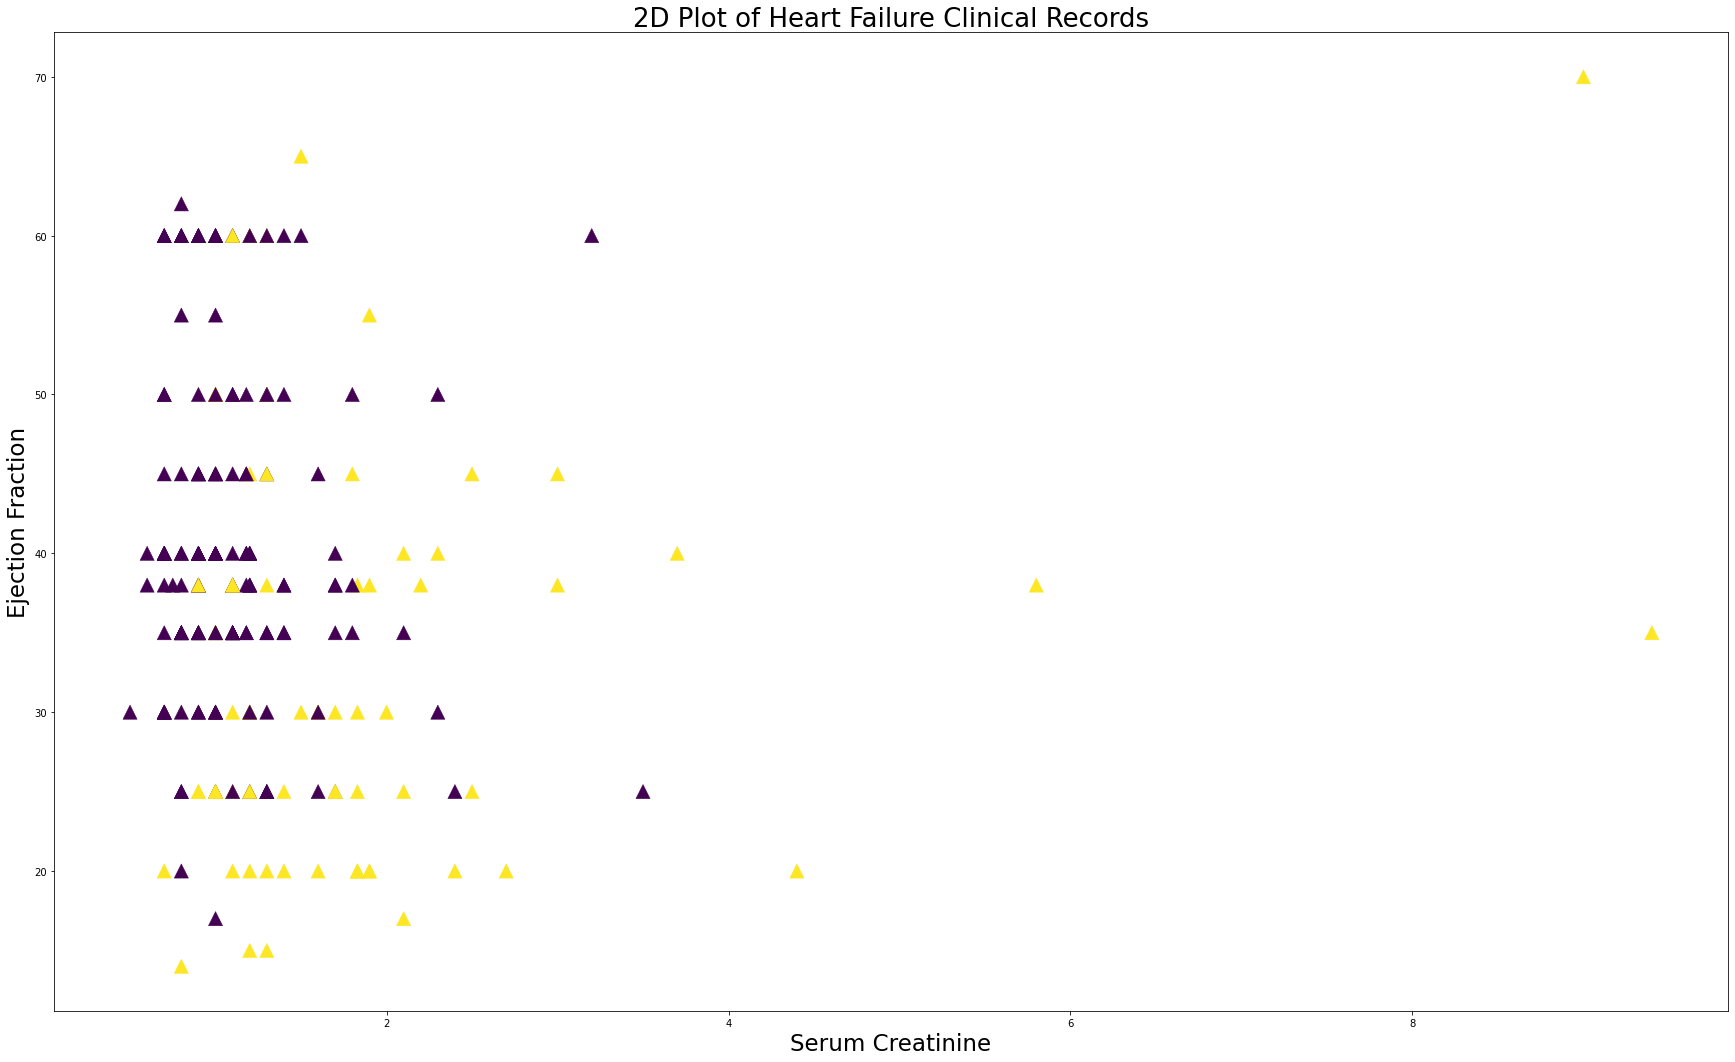

In [570]:
# Visualisation of Features - 2D

hfcr_fs_X_train, hfcr_fs_X_test, hfcr_fs_y_train , hfcr_fs_y_test = train_test_split(hfcr_fs_X, 
                                                                                 hfcr_y, 
                                                                                 test_size = 0.2,
                                                                                  random_state=10)
fig = plt.figure(figsize = (30,18))

ax = plt.axes()
ax.scatter(x=hfcr_fs_X_train['serum_creatinine'],
           y=hfcr_fs_X_train['ejection_fraction'],
           label='First Plot', linewidth=0.5, c=hfcr_fs_y_train['DEATH_EVENT'], s= 200 ,
           marker='^')

ax.set_xlabel('Serum Creatinine', fontsize = 23)
ax.set_ylabel('Ejection Fraction', fontsize = 23)
ax.set_title('2D Plot of Heart Failure Clinical Records', fontsize = 26)
plt.show()

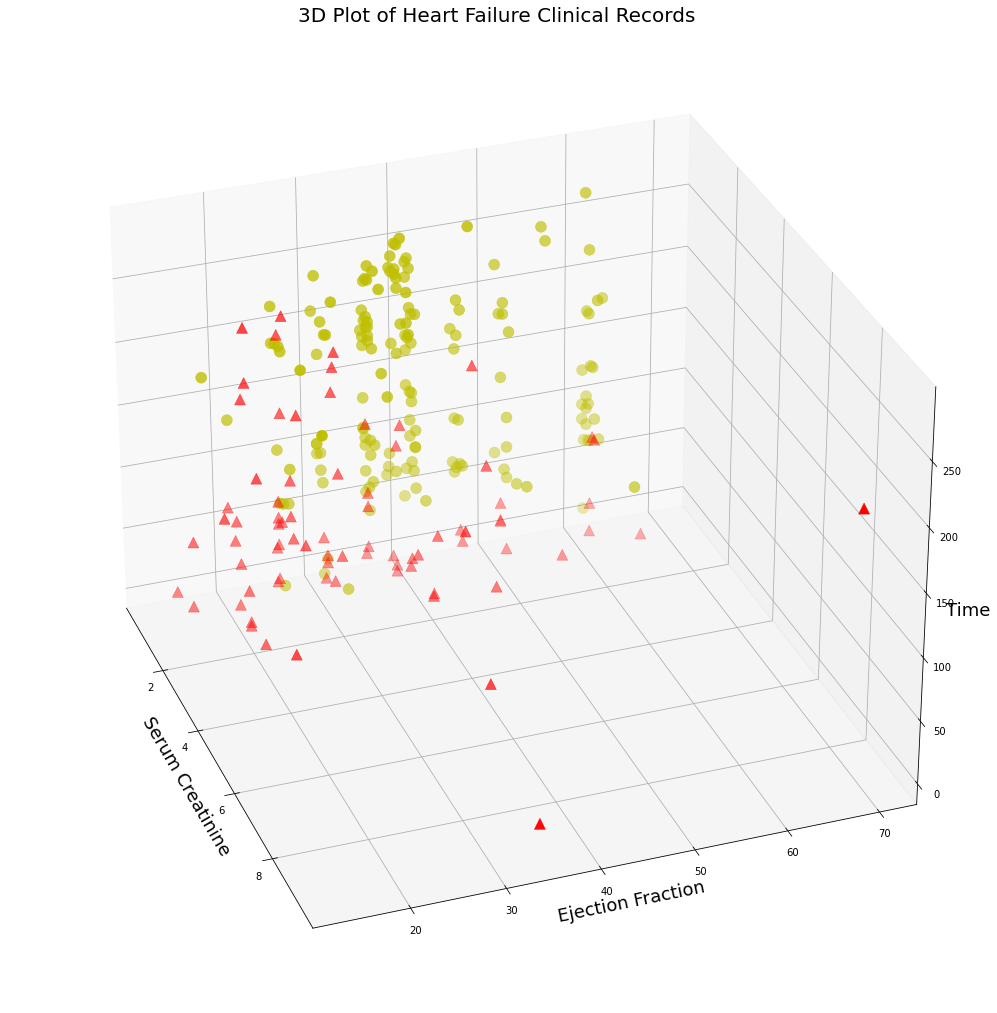

In [571]:
# Visualisation of Selected Features 3D

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (30,18))

hfcr_fs_Xy_train = pd.concat([hfcr_fs_X_train,hfcr_fs_y_train],axis =1)
hfcr_fs_Xy_train_alive = hfcr_fs_Xy_train[hfcr_fs_Xy_train['DEATH_EVENT']==0]
hfcr_fs_Xy_train_dead = hfcr_fs_Xy_train[hfcr_fs_Xy_train['DEATH_EVENT']==1]

ax = plt.axes(projection='3d')
ax.view_init(30,340)
ax.scatter(hfcr_fs_Xy_train_alive['serum_creatinine'],
           hfcr_fs_Xy_train_alive['ejection_fraction'],
           hfcr_fs_Xy_train_alive['time'],label='First Plot', linewidth=0.5, c ='y', s= 120 )

ax.scatter(hfcr_fs_Xy_train_dead['serum_creatinine'],
           hfcr_fs_Xy_train_dead['ejection_fraction'],
           hfcr_fs_Xy_train_dead['time'],label='Second Plot', linewidth=0.5, c ='r', s= 120, marker='^')
ax.set_xlabel('Serum Creatinine', fontsize = 18)
ax.set_ylabel('Ejection Fraction', fontsize = 18)
ax.set_zlabel('Time', fontsize = 18)
ax.set_title('3D Plot of Heart Failure Clinical Records', fontsize = 20)
plt.show()

##### Section 3: SMOTE validation on Logistic Regression ML model for selected features 


In [572]:

# create train-test sets

hfcr_fs_X_train, hfcr_fs_X_test, hfcr_fs_y_train , hfcr_fs_y_test = train_test_split(hfcr_fs_X, 
                                                                                 hfcr_y, 
                                                                                 test_size = 0.30,
                                                                                    random_state = 79)
#Create an oversampled training data
smote = SMOTE(random_state = 12)
X_train_smote, y_train_smote = smote.fit_resample(hfcr_fs_X_train, hfcr_fs_y_train)

#Training with imbalance data

classifier = LogisticRegression()
classifier.fit(hfcr_fs_X_train.values, hfcr_fs_y_train.values.ravel())

print("Classification report on Training set without SMOTE: \n")
print(classification_report(hfcr_fs_y_train, classifier.predict(hfcr_fs_X_train)))
print("Classification report on test set with training without SMOTE: \n")
print(classification_report(hfcr_fs_y_test, classifier.predict(hfcr_fs_X_test)))

#Training without imbalance data
classifier_smote = LogisticRegression()
classifier_smote.fit(X_train_smote.values, y_train_smote.values.ravel())
print("Classification report on training set with SMOTE: \n")
print(classification_report(y_train_smote, classifier_smote.predict(X_train_smote)))
print("Classification report on test set with training using SMOTE: \n")
print(classification_report(hfcr_fs_y_test, classifier_smote.predict(hfcr_fs_X_test)))

Classification report on Training set without SMOTE: 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       138
           1       0.77      0.69      0.73        71

    accuracy                           0.82       209
   macro avg       0.81      0.79      0.80       209
weighted avg       0.82      0.82      0.82       209

Classification report on test set with training without SMOTE: 

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        65
           1       0.80      0.64      0.71        25

    accuracy                           0.86        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.85      0.86      0.85        90

Classification report on training set with SMOTE: 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       138
           1       0.78      0.80      0.79       138

    accura

#### Section 4: GridSearch 

In [573]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Split training and testing data
hfcr_fs_X_train, hfcr_fs_X_test, hfcr_fs_y_train , hfcr_fs_y_test = train_test_split(hfcr_fs_X, 
                                                                                 hfcr_y, test_size = 0.2,
                                                                                    random_state = 79)


smote = SMOTE( random_state = 79)
hfcr_fs_X_train, hfcr_fs_y_train = smote.fit_resample(hfcr_fs_X_train, hfcr_fs_y_train) 

scale = StandardScaler()
hfcr_fs_X_train = scale.fit_transform(hfcr_fs_X_train)
hfcr_fs_X_test = scale.fit(hfcr_fs_X_test)



knn_estimator = KNeighborsClassifier()    
knn_param = {'n_neighbors': range(1,18,2,), 'weights':['uniform', 'distance'],
             'metric':['euclidean', 'manhattan','minkowski', 'chebyshev']}
gridsearchcv(knn_param, hfcr_fs_X_train, hfcr_fs_y_train, knn_estimator)


dtc_estimator = DecisionTreeClassifier()
dtc_param = {'criterion':['entropy','gini'], 'max_depth': [2,3,4,5,6,7,8,9,10], 'max_leaf_nodes':[2,3,4,5]}
gridsearchcv(dtc_param, hfcr_fs_X_train, hfcr_fs_y_train, dtc_estimator)

# 6. Decision Trees
#https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch06.html#idm45022163237800



logr_estimator = LogisticRegressionCV()
logr_param = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'Cs': [0.0001,0.001,0.01,0.1,1,10],
              'penalty':['l1','2','elasticnet']}
gridsearchcv(logr_param, hfcr_fs_X_train, hfcr_fs_y_train, logr_estimator)


gb_estimator = GradientBoostingClassifier()
gb_param = {'max_depth': [2,3,4,5,6,7,8,9,10],
            'n_estimators':[2,10,50,100],
            'learning_rate': [1,2,3]}
gridsearchcv(gb_param, hfcr_fs_X_train, hfcr_fs_y_train, gb_estimator)


svc_estimator = SVC()
svc_param = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
gridsearchcv(svc_param, hfcr_fs_X_train, hfcr_fs_y_train, svc_estimator)

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') has best accurary of 0.88 with parameters KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best') has best accurary of 0.84 with parameters DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Section 5: Stacked Ensemble 

In [574]:

# Split training and testing data
hfcr_fs_X_train, hfcr_fs_X_test, hfcr_fs_y_train , hfcr_fs_y_test = train_test_split(hfcr_fs_X, 
                                                                                 hfcr_y, test_size = 0.2,
                                                                                    random_state = 79)


# balance the training dataset with synthetic data
smote = SMOTE(random_state = 79)
hfcr_fs_X_train, hfcr_fs_y_train = smote.fit_resample(hfcr_fs_X_train, hfcr_fs_y_train) 

# scale the training and test dataset 
scale = StandardScaler()
hfcr_fs_X_train = scale.fit_transform(hfcr_fs_X_train)
hfcr_fs_X_test = scale.transform(hfcr_fs_X_test)


# inititiate base learners                                                                           
base_learners = []

# create dataframe to store results of base learners and meta learner 
base_learner_eval = pd.DataFrame(columns = ov_predict_rslts_cols)
meta_learner_eval = pd.DataFrame(columns = ov_predict_rslts_cols)


# Base Learner 1: KNN 
knn_estimator = KNeighborsClassifier() 
knn_param = {'n_neighbors': range(1,18,2,), 'weights':['uniform', 'distance'],
             'metric':['euclidean', 'manhattan','minkowski', 'chebyshev']}
base_learners.append(gridsearchcv(knn_param, hfcr_fs_X_train, hfcr_fs_y_train, knn_estimator))
#print(gridsearchcv(knn_param, hfcr_fs_X_train, hfcr_fs_y_train, knn_estimator)) 


# Base Learner 2: DT 
dtc_estimator = DecisionTreeClassifier()
dtc_param = {'criterion':['entropy','gini'], 'max_depth': [2,3,4,5,6,7,8,9,10]}
base_learners.append(gridsearchcv(dtc_param, hfcr_fs_X_train, hfcr_fs_y_train, dtc_estimator))
#print(gridsearchcv(dtc_param, hfcr_fs_X_train, hfcr_fs_y_train, dtc_estimator))


logr_estimator = LogisticRegressionCV()
logr_param = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'Cs': [0.0001,0.001,0.01,0.1,1,10],
              'penalty':['l1','2','elasticnet']}
base_learners.append(gridsearchcv(logr_param, hfcr_fs_X_train, hfcr_fs_y_train, logr_estimator))
#print(gridsearchcv(logr_param, hfcr_fs_X_train, hfcr_fs_y_train, logr_estimator))


gb_estimator = GradientBoostingClassifier()
gb_param = {'max_depth': [2,3,4,5,6,7,8,9,10],
            'n_estimators':[2,10,50,100],
            'learning_rate': [1,2,3]}
base_learners.append(gridsearchcv(gb_param, hfcr_fs_X_train, hfcr_fs_y_train, gb_estimator))
#print(gridsearchcv(gb_param, hfcr_fs_X_train, hfcr_fs_y_train, gb_estimator))


svc_estimator = SVC(probability=True)
svc_param = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
base_learners.append(gridsearchcv(svc_param, hfcr_fs_X_train, hfcr_fs_y_train, svc_estimator))
#print(gridsearchcv(svc_param, hfcr_fs_X_train, hfcr_fs_y_train, svc_estimator))

print()

meta_learner = LogisticRegression()

#Create training data 
meta_data = np.zeros((len(base_learners),len(hfcr_fs_X_train)))                                                                                     
meta_targets = np.zeros(len(hfcr_fs_X_train))                                                                                     

# create KFolds 

KF = KFold(n_splits=8)
meta_index = 0

for train_indices, test_indices in KF.split(hfcr_fs_X_train):
    
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(hfcr_fs_X_train[train_indices], hfcr_fs_y_train.values[train_indices])
        predictions = learner.predict_proba(hfcr_fs_X_train[test_indices])[:,0]

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions
    
    #Debug codes 
    #print(hfcr_fs_y_train.values.ravel()[test_indices])
    #print(meta_targets)
    #print(test_indices)
    #print(test_indices.shape)
    #print(meta_index)
    
    meta_targets[meta_index:meta_index+len(test_indices)] = hfcr_fs_y_train.values.ravel()[test_indices]
    meta_index += len(test_indices)


meta_data = meta_data.transpose()


test_meta_data = np.zeros((len(base_learners), len(hfcr_fs_X_test)))
base_acc = []
for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(hfcr_fs_X_train, hfcr_fs_y_train.values.ravel())
    predictions = learner.predict_proba(hfcr_fs_X_test)[:,0]
    test_meta_data[i] = predictions

    acc = metrics.accuracy_score(hfcr_fs_y_test.values.ravel(), learner.predict(hfcr_fs_X_test))
    base_acc.append(acc)

    # Prediction results of base-learners
    q2_predict_rslts_df = q2_predict_rslts_df.append(model_eval(hfcr_fs_y_test.values.ravel(),
                                                                learner.predict(hfcr_fs_X_test),
                                                        f"Base Learner: {learner.__class__.__name__}", i),
                                             ignore_index = True)
    
test_meta_data = test_meta_data.transpose()



meta_learner.fit(meta_data, meta_targets)
ensemble_predictions = meta_learner.predict(test_meta_data)

acc = metrics.accuracy_score(hfcr_fs_y_test.values.ravel(), ensemble_predictions)
 
    
# save aggregated results to overall results dataframe
q2_predict_rslts_df = q2_predict_rslts_df.append(model_eval(hfcr_fs_y_test.values.ravel(),
                                                                ensemble_predictions,
                                                        f"Ensemble: ", i+1),
                                             ignore_index = True)
print("Accuracy Summary:")
print()
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_acc[i]:.2f} {learner.__class__.__name__}')
print(f'{acc:.2f} Ensemble')



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') has best accurary of 0.88 with parameters KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best') has best accurary of 0.83 with parameters DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_

##### Overall results - Question 2 ML Models

In [575]:
# view results (Question 2 Results)
print("Base-learners and Ensemble prediction performance:\n")
q2_predict_rslts_df
q2_predict_rslts_df.style.highlight_max(color = 'lightblue', axis = 0)


Base-learners and Ensemble prediction performance:



,Method,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC,Test Run
0,Base Learner: KNeighborsClassifier,0.920635,0.944444,0.967000,0.944444,0.976190,0.908642,0.960317,0
1,Base Learner: DecisionTreeClassifier,0.694365,0.789474,0.867000,0.833333,0.880952,0.675000,0.857143,1
2,Base Learner: LogisticRegressionCV,0.579066,0.714286,0.800000,0.833333,0.785714,0.570833,0.809524,2
3,Base Learner: GradientBoostingClassifier,0.713933,0.787879,0.883000,0.722222,0.952381,0.709259,0.837302,3
4,Base Learner: SVC,0.663388,0.769231,0.850000,0.833333,0.857143,0.645238,0.845238,4
5,Ensemble:,0.879748,0.914286,0.950000,0.888889,0.976190,0.869935,0.932540,5


In [576]:
# save aggregated results to overall results dataframe - mean of result if ensemble if run more than once
print("Base-learners and Ensemble prediction mean performance if model is run more than once:\n")
mean_predict_rslts_df = pd.DataFrame()
mean_predict_rslts_df = mean_predict_rslts_df.append(q2_predict_rslts_df.groupby("Method", axis = 0).mean().round(3))
mean_predict_rslts_df
mean_predict_rslts_df.style.highlight_max(color = 'lightblue', axis = 0)

Base-learners and Ensemble prediction mean performance if model is run more than once:



,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Method,,,,,,,
Base Learner: DecisionTreeClassifier,0.694000,0.789000,0.867000,0.833000,0.881000,0.675000,0.857000
Base Learner: GradientBoostingClassifier,0.714000,0.788000,0.883000,0.722000,0.952000,0.709000,0.837000
Base Learner: KNeighborsClassifier,0.921000,0.944000,0.967000,0.944000,0.976000,0.909000,0.960000
Base Learner: LogisticRegressionCV,0.579000,0.714000,0.800000,0.833000,0.786000,0.571000,0.810000
Base Learner: SVC,0.663000,0.769000,0.850000,0.833000,0.857000,0.645000,0.845000
Ensemble:,0.880000,0.914000,0.950000,0.889000,0.976000,0.870000,0.933000
